In [11]:
# Input beta
import numpy as np
beta = np.array([[0.593693855698226,0.0204216071809354,0.385884537120837],
                 [0.966521739130434, 0, 0.0334782608695652],
                 [0.776982707100775, 0.0125223612093023, 0.210494931689922],
                 [0.586456671938596, 0.0168128654824561, 0.396730462578947],
                 [0.362695924581818, 0, 0.637304075418181]])

# Input s
s = np.array([-1, 0, 1])

# Calculate e; = Σ Sa
e11 = np.einsum('ij,j->i', beta, s)
print(e11)

[-0.20780932 -0.93304348 -0.56648778 -0.18972621  0.27460815]


In [2]:
# Input beta
import numpy as np
beta = np.array([[0.656565656666666,0.015151515,0.328282828333333],
                 [0.96314186248912,0.00335073977371627,0.0335073977371627],
                 [0.659931840170886,0.0159039272088607,0.324164232620253],
                 [0.649010768980897,0.0174680691018078,0.333521161917294],
                 [0.625660142740765,0.0177073625524965,0.356632494706738],
                ])

# Input s
s = np.array([-1, 0, 1])

# Calculate e; = Σ Sa
e12 = np.einsum('ij,j->i', beta, s)
print(e11)

[-0.20780932 -0.93304348 -0.56648778 -0.18972621  0.27460815]


In [3]:
# Input beta
import numpy as np
beta = np.array([[0.676911157, 0.009986226, 0.313102617],
                 [0.937264957, 0, 0.062735043],
                 [0.653284671, 0.008235074, 0.338480255],
                 [0.676682075, 0.009758603, 0.313559322],
                 [0.83908046, 0,	0.16091954],
                ])

# Input s
s = np.array([-1, 0, 1])

# Calculate e; = Σ Sa
e13 = np.einsum('ij,j->i', beta, s)
print(e11)

[-0.20780932 -0.93304348 -0.56648778 -0.18972621  0.27460815]


In [4]:
# Input beta
import numpy as np
beta = np.array([[0.664448052, 0.018127706,	0.317424242],
                 [0.949784483, 0.003318966,	0.046896552],
                 [0.658560794, 0.008271299,	0.333167907],
                 [0.671802774, 0.017141757,	0.31105547],
                 [0.557290253, 0.005701873,	0.437007874],
])

# Input s
s = np.array([-1, 0, 1])

# Calculate e; = Σ Sa
e14 = np.einsum('ij,j->i', beta, s)
print(e11)

[-0.20780932 -0.93304348 -0.56648778 -0.18972621  0.27460815]


In [5]:
result_matrix = np.vstack((e11, e12, e13, e14)).T

In [6]:
print(result_matrix)

[[-0.20780932 -0.32828283 -0.36380854 -0.34702381]
 [-0.93304348 -0.92963446 -0.87452991 -0.90288793]
 [-0.56648778 -0.33576761 -0.31480442 -0.32539289]
 [-0.18972621 -0.31548961 -0.36312275 -0.3607473 ]
 [ 0.27460815 -0.26902765 -0.67816092 -0.12028238]]


In [9]:
# import numpy as np

# def fuzzy_best_worst_method(matrix):
#     # Step 1: Normalize the matrix using Min-Max normalization
#     normalized_matrix = (matrix - matrix.min(axis=0)) / (matrix.max(axis=0) - matrix.min(axis=0))

#     # Step 2: Identify best and worst values for each criterion
#     best_values = normalized_matrix.max(axis=0)
#     worst_values = normalized_matrix.min(axis=0)

#     # Step 3: Calculate deviation scores
#     deviation_scores = np.abs(normalized_matrix - best_values)

#     # Step 4: Apply a fuzzy membership function (e.g., linear)
#     fuzzy_scores = 1 - deviation_scores

#     # Step 5: Aggregate fuzzy scores (weighted average)
#     weights = [0.354, 0.235, 0.292, 0.118]  # Adjust weights based on criterion importance
#     aggregated_scores = np.dot(fuzzy_scores, weights)

#     # Step 6: Rank alternatives
#     rankings = np.argsort(aggregated_scores)[::-1] + 1  # Reverse order for ranking

#     return rankings

# # Example usage with the provided matrix
# input_matrix = np.array([
#      [-0.20780932, -0.32828283, -0.36380854, -0.34702381],
#      [-0.93304348, -0.92963446, -0.87452991, -0.90288793],
#      [-0.56648778, -0.33576761, -0.31480442, -0.32539289],
#      [-0.18972621, -0.31548961, -0.36312275, -0.3607473 ],
#      [ 0.27460815, -0.26902765, -0.67816092, -0.12028238]
# ])

# rankings = fuzzy_best_worst_method(input_matrix)
# print("Rankings:", rankings)

Rankings: [5 4 1 3 2]


In [11]:
import numpy as np

def min_max_normalization(matrix):
    return (matrix - matrix.min(axis=0)) / (matrix.max(axis=0) - matrix.min(axis=0))

def triangular_membership(x, a, b, c):
    if x <= a or x >= c:
        return 0.0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x < c:
        return (c - x) / (c - b)

def fuzzy_best_worst_method(matrix, is_maximization, weights=None):
    num_alternatives, num_criteria = matrix.shape

    # Step 1: Normalize the matrix using Min-Max normalization
    normalized_matrix = min_max_normalization(matrix)

    # Step 2: Identify best and worst values for each criterion
    if is_maximization:
        best_values = normalized_matrix.max(axis=0)
        worst_values = normalized_matrix.min(axis=0)
    else:
        best_values = normalized_matrix.min(axis=0)
        worst_values = normalized_matrix.max(axis=0)

    # Step 3: Calculate deviation scores
    deviation_scores = np.abs(normalized_matrix - best_values)

    # Step 4: Apply a triangular membership function
    fuzzy_scores = np.zeros_like(deviation_scores)
    for i in range(num_criteria):
        for j in range(num_alternatives):
            fuzzy_scores[j, i] = triangular_membership(deviation_scores[j, i], 0, 0.2, 0.4)

    # Step 5: Weighted aggregation of fuzzy scores
    if weights is None:
        weights = np.ones(num_criteria) / num_criteria
    else:
        weights /= np.sum(weights)  # Normalize weights to ensure their sum is 1

    aggregated_scores = np.dot(fuzzy_scores, weights)

    # Step 6: Rank alternatives
    rankings = np.argsort(aggregated_scores)[::-1] + 1  # Reverse order for ranking

    return rankings

# Example usage with the provided matrix
input_matrix = np.array([
    [-0.20780932, -0.32828283, -0.36380854, -0.34702381],
     [-0.93304348, -0.92963446, -0.87452991, -0.90288793],
     [-0.56648778, -0.33576761, -0.31480442, -0.32539289],
     [-0.18972621, -0.31548961, -0.36312275, -0.3607473 ],
     [ 0.27460815, -0.26902765, -0.67816092, -0.12028238]
])

# Specify whether each criterion is for maximization (True) or minimization (False)
maximization_criteria = [True, True, False, True]

# Weights for each criterion (customize based on importance)
criteria_weights = [0.354, 0.235, 0.292, 0.118]

rankings = fuzzy_best_worst_method(input_matrix, maximization_criteria, criteria_weights)
print("Rankings:", rankings)


Rankings: [1 4 3 5 2]


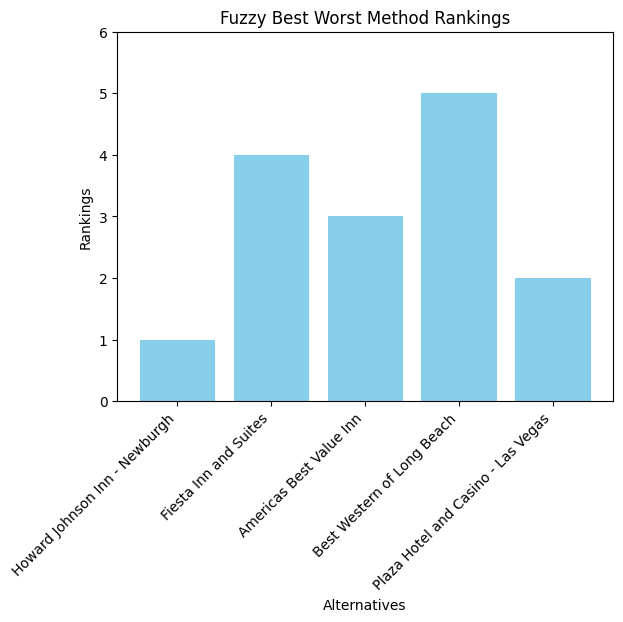

In [14]:

# import numpy as np
# import matplotlib.pyplot as plt

# def plot_rankings(rankings, alternative_names):
#     num_alternatives = len(rankings)

#     plt.bar(range(1, num_alternatives + 1), rankings, color='skyblue')
#     plt.xlabel('Alternatives')
#     plt.ylabel('Rankings')
#     plt.title('Fuzzy Best Worst Method Rankings')
#     plt.ylim(0, num_alternatives + 1)  # Adjust the y-axis limits based on the number of alternatives
#     plt.xticks(range(1, num_alternatives + 1), alternative_names, rotation=45, ha='right')  # Set alternative names as x-axis labels
#     plt.show()

# # Example usage with alternative names
# alternative_names = [
#     'Howard Johnson Inn - Newburgh',
#     'Fiesta Inn and Suites',
#     'Americas Best Value Inn',
#     'Best Western of Long Beach',
#     'Plaza Hotel and Casino - Las Vegas'
# ]

# input_matrix = np.array([
#     [-0.20780932, -0.32828283, -0.36380854, -0.34702381],
#     [-0.93304348, -0.92963446, -0.87452991, -0.90288793],
#     [-0.56648778, -0.33576761, -0.31480442, -0.32539289],
#     [-0.18972621, -0.31548961, -0.36312275, -0.3607473 ],
#     [0.27460815, -0.26902765, -0.67816092, -0.12028238]
# ])

# maximization_criteria = [True, True, True, True]
# criteria_weights = [0.354, 0.235, 0.292, 0.118]

# rankings = fuzzy_best_worst_method(input_matrix, maximization_criteria, criteria_weights)

# # Plot the rankings graphically with alternative names as y-axis labels
# plot_rankings(rankings, alternative_names)


In [4]:
def calculate_bwm_weights(criteria, best_criterion, worst_criterion, comparisons):

  n = len(criteria)

  # Initialize weights vector
  weights = [1.0] * n

  # Consistency ratio calculation (optional)
  total_comparisons = n * (n - 1)

  # Calculate weights based on comparisons
  for (i, j), score in comparisons.items():
    if i != j:
      weights[i] *= score
      weights[j] /= score

  # Normalize weights to sum to 1
  total_weight = sum(weights)
  weights = [w / total_weight for w in weights]

  # Calculate consistency ratio (optional)
  # ... (consistency ratio calculation logic here)

  return weights

# Example usage
criteria = ["Room", "Stay", "Clean", "Staff"]
best_criterion = 0  
worst_criterion = 2   

comparisons = {
  (2, 0): 2,  
  (2, 1): 3,
  (2, 2): 1,
  (2, 3): 5, 
  (0, 3): 3,
  (1, 3): 4,
  (2, 3): 5,
  (3, 3): 1,
}

weights = calculate_bwm_weights(criteria, best_criterion, worst_criterion, comparisons)

# Print the calculated weights
for criterion, weight in zip(criteria, weights):
  print(f"{criterion}: {weight:.2f}")


Room: 0.05
Stay: 0.04
Clean: 0.91
Staff: 0.00


In [2]:
import numpy as np

def best_worst_method(pairwise_matrix):
    # Calculate the Best and Worst values for each criterion
    best_values = np.max(pairwise_matrix, axis=1)
    worst_values = np.min(pairwise_matrix, axis=1)
    
    # Calculate the Best and Worst Indices
    best_indices = np.argmax(pairwise_matrix, axis=1)
    worst_indices = np.argmin(pairwise_matrix, axis=1)
    
    return best_values, worst_values, best_indices, worst_indices

def normalize_matrix(pairwise_matrix):
    # Normalize the pairwise comparison matrix
    normalized_matrix = pairwise_matrix / np.sum(pairwise_matrix, axis=0)
    return normalized_matrix

def calculate_weights(normalized_matrix, best_values, worst_values):
    # Calculate the weights using the Best Worst Method
    weights = (best_values - normalized_matrix) / (best_values - worst_values)
    return weights

def bwm(subjects, criteria_matrix):
    # Perform Best Worst Method to find subjective weights
    num_subjects, num_criteria = criteria_matrix.shape
    
    # Initialize an empty matrix to store pairwise comparison results
    pairwise_matrix = np.zeros((num_criteria, num_criteria))
    
    # Step 1: Perform pairwise comparisons
    for i in range(num_criteria):
        for j in range(i + 1, num_criteria):
            # Assuming a simple user input for the sake of example
            pairwise_matrix[i, j] = float(input(f"Compare criterion {i+1} with criterion {j+1} (1 if equal, >1 if more important, <1 if less important): "))
            pairwise_matrix[j, i] = 1 / pairwise_matrix[i, j]
    
    # Step 2: Apply the Best Worst Method
    best_values, worst_values, _, _ = best_worst_method(pairwise_matrix)
    
    # Step 3: Normalize the matrix
    normalized_matrix = normalize_matrix(pairwise_matrix)
    
    # Step 4: Calculate the weights
    weights = calculate_weights(normalized_matrix, best_values, worst_values)
    
    # Display results
    for i in range(num_criteria):
        print(f"Criterion {i+1} Weight: {weights[i]}")
    
    return weights

# Example usage
num_subjects = 5
num_criteria = 4
criteria_matrix = np.random.rand(num_subjects, num_criteria)

subject_weights = bwm(num_subjects, criteria_matrix)

KeyboardInterrupt: Interrupted by user